In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("./synthetic_financial_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [4]:
df.head(5)

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [13]:
epoch_time = datetime.datetime(1970, 1, 1)

In [28]:
epoch_time.timestamp()

OSError: [Errno 22] Invalid argument

In [30]:
datetime.datetime.timestamp(pd.to_datetime(df["transaction_time"])[0])

1672560000.0

In [34]:
df["transaction_time"] = df["transaction_time"].apply(lambda x: datetime.datetime.timestamp(pd.to_datetime(x)))

In [35]:
df["card_type"].unique()

array(['MasterCard', 'Visa', 'Discover', 'American Express'], dtype=object)

In [36]:
df["purchase_category"].unique()

array(['Gas Station', 'Online Shopping', 'Travel', 'Retail', 'Groceries',
       'Restaurant'], dtype=object)

In [37]:
df["location"].unique()

array(['City-30', 'City-47', 'City-6', 'City-34', 'City-1', 'City-7',
       'City-46', 'City-45', 'City-25', 'City-29', 'City-19', 'City-13',
       'City-4', 'City-17', 'City-35', 'City-40', 'City-38', 'City-22',
       'City-39', 'City-10', 'City-15', 'City-44', 'City-27', 'City-37',
       'City-50', 'City-18', 'City-31', 'City-14', 'City-41', 'City-20',
       'City-33', 'City-26', 'City-48', 'City-43', 'City-21', 'City-11',
       'City-5', 'City-3', 'City-2', 'City-9', 'City-24', 'City-32',
       'City-49', 'City-28', 'City-16', 'City-23', 'City-12', 'City-42',
       'City-36', 'City-8'], dtype=object)

In [38]:
df["merchant_id"].unique()

array([2027, 2053, 2035, 2037, 2083, 2021, 2033, 2088, 2077, 2031, 2052,
       2015, 2020, 2025, 2004, 2032, 2040, 2060, 2063, 2072, 2056, 2055,
       2005, 2026, 2018, 2034, 2036, 2085, 2071, 2023, 2006, 2093, 2003,
       2008, 2011, 2041, 2078, 2039, 2009, 2047, 2086, 2012, 2051, 2074,
       2095, 2065, 2016, 2067, 2075, 2100, 2068, 2064, 2099, 2043, 2050,
       2096, 2028, 2019, 2014, 2057, 2076, 2069, 2048, 2090, 2070, 2061,
       2092, 2007, 2089, 2082, 2002, 2097, 2081, 2013, 2046, 2054, 2094,
       2042, 2059, 2098, 2024, 2001, 2084, 2017, 2058, 2062, 2049, 2029,
       2079, 2030, 2022, 2080, 2073, 2087, 2038, 2091, 2010, 2044, 2045,
       2066])

In [39]:
temp = sorted(df["location"].unique())

In [40]:
city_keys = {city: int(city[5:]) for city in temp}

In [41]:
df["location"] = df["location"].map(city_keys)

In [42]:
purchase_category_unique = [x for x in df["purchase_category"].unique()]
purchase_category_keys =  {purchase_category_unique[i]: i for i in range(len(purchase_category_unique)) }

In [43]:
df["purchase_category"] = df["purchase_category"].map(purchase_category_keys)

In [44]:
card_type_unique = df["card_type"].unique()
card_type_keys = {card_type_unique[i]: i for i in range(len(card_type_unique))}

In [45]:
df["card_type"] = df["card_type"].map(card_type_keys)

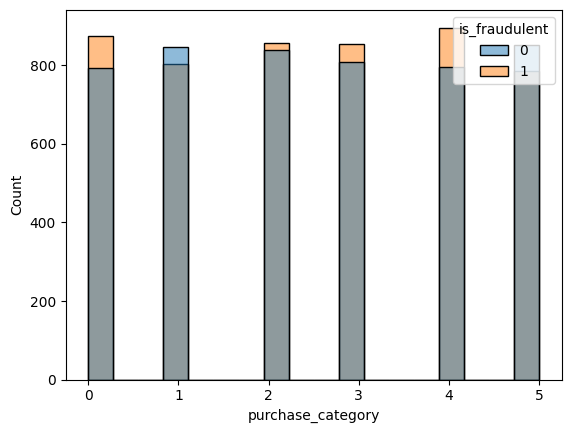

In [46]:
sns.histplot(data=df, x="purchase_category", hue="is_fraudulent")
plt.show()

In [47]:
df

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,1.672560e+09,0,0,30,0,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,1.672560e+09,1,1,47,1,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,1.672560e+09,1,0,6,0,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,1.672560e+09,1,2,6,2,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,1.672560e+09,1,0,34,3,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,1.672570e+09,1,0,39,5,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,1.672570e+09,0,0,32,3,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,1.672570e+09,0,3,1,1,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,1.672570e+09,1,1,11,3,57,Purchase at Merchant-2019


In [48]:
feature = ["transaction_time" ,"merchant_id", "amount", "card_type", "location", "purchase_category", "customer_age"]
target = ["is_fraudulent"]
x = df[feature]
y = df[target]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [50]:
x

,transaction_time,merchant_id,amount,card_type,location,purchase_category,customer_age
0,1.672560e+09,2027,5758.59,0,30,0,43
1,1.672560e+09,2053,1901.56,1,47,1,61
2,1.672560e+09,2035,1248.86,0,6,0,57
3,1.672560e+09,2037,7619.05,2,6,2,59
4,1.672560e+09,2083,1890.10,0,34,3,36
...,...,...,...,...,...,...,...
9995,1.672570e+09,2023,8935.28,0,39,5,36
9996,1.672570e+09,2026,30.15,0,32,3,42
9997,1.672570e+09,2034,6333.64,3,1,1,36
9998,1.672570e+09,2019,2837.13,1,11,3,57


In [51]:
normalized = MinMaxScaler()
normalized_data = normalized.fit_transform(x)

In [52]:
normalized_data

array([[0.00000000e+00, 2.62626263e-01, 5.75422909e-01, ...,
        5.91836735e-01, 0.00000000e+00, 4.80769231e-01],
       [1.00010016e-04, 5.25252525e-01, 1.89300580e-01, ...,
        9.38775510e-01, 2.00000000e-01, 8.26923077e-01],
       [2.00020004e-04, 3.43434343e-01, 1.23959620e-01, ...,
        1.02040816e-01, 0.00000000e+00, 7.50000000e-01],
       ...,
       [9.99799980e-01, 3.33333333e-01, 6.32990428e-01, ...,
        0.00000000e+00, 2.00000000e-01, 3.46153846e-01],
       [9.99899990e-01, 1.81818182e-01, 2.82959294e-01, ...,
        2.04081633e-01, 6.00000000e-01, 7.50000000e-01],
       [1.00000000e+00, 6.96969697e-01, 7.20664642e-01, ...,
        0.00000000e+00, 0.00000000e+00, 6.15384615e-01]], shape=(10000, 7))

In [53]:
x_train, x_test, y_train, y_test = train_test_split(normalized_data, y, train_size=0.7)

In [70]:
kmeans_classifier = KMeans(2, max_iter=300)
knn_classifier = KNeighborsClassifier(3)

In [71]:
kmeans_classifier.fit(x_train, y_train)

KMeans(n_clusters=2)

In [72]:
y_train.shape

(7000, 1)

In [73]:
np.reshape(y_train, shape=(-1))

array([1, 0, 1, ..., 1, 1, 1], shape=(7000,))

In [74]:
knn_classifier.fit(x_train, np.reshape(y_train, shape=(-1)))

KNeighborsClassifier(n_neighbors=3)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test, kmeans_classifier.predict(x_test))

0.5243333333333333

In [77]:
accuracy_score(y_test, knn_classifier.predict(x_test))

0.49466666666666664